## **1. Getting Started**

### **1.1 Install Libraries**


In [1]:
!pip install PyMuPDF==1.16.14

In [2]:
# 2.1 Text Extraction
# !pip install textract

# 3.2 LDA Mallet Model
# manually download & copy into the folder instead
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# !unzip mallet-2.0.8.zip

In [3]:
# !pip install PyPDF2

### **1.2 Import Libraries**

In [4]:
# 2.1 Text Extraction
import re
import os
import fitz
# import textract
import numpy as np
import pandas as pd
import math
# For getting information about the pdfs
# from PyPDF2 import PdfFileReader, PdfFileWriter

# 2.2 Data Cleaning
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install spacy
import spacy
!python3 -m spacy download en_core_web_sm
!pip install --upgrade gensim==3.6.0

# 2.3 Creating Corpus
import gensim.corpora as corpora

# 2.4 Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# 3.1 Word2Vec Model
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 3.2 LDA Mallet Model
from gensim.models import CoherenceModel

# 4.2 Top 10 Word Count
import operator
from collections import Counter

# 4.4 Bigram Analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

# 4.5 Sentiment Analysis
!pip install textblob
from textblob import TextBlob
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import tree

C:\Users\Lu Xinyi\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package stopwords to C:\Users\Lu
[nltk_data]     Xinyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


Requirement already up-to-date: gensim==3.6.0 in c:\users\lu xinyi\anaconda3\lib\site-packages (3.6.0)


In [5]:
print(gensim.__version__)

3.6.0


## **2. Data Preprocessing**

### **2.1 Text Extraction**
*   Import PDF using Textract
*   Clean up weird symbols, characters
*   Split text into sentences

In [6]:
# # function that takes in a file path and return a string of extracted text
# def read_pdf(file_path):
# #     print(type(file_path))
#     report = textract.process(str(file_path), method = 'pdfminer')
#     text = report.decode("utf-8")
#     return text

In [7]:
#def read_pdf(file_path):
    #for a single pdf
    #reader = PdfFileReader(file_path)
    
#     for page_num in range(reader.numPages):
#         #print("Page: {0}".format(page_num))
#         pageObj = reader.getPage(page_num)
#         txt = pageObj.extractText()
        
#     return text

In [8]:
# function takes in a report and breaks it up into individual sentences
def convert_pdf_into_sentences(text):

    # remove unnecessary spaces and line breaks
    text = re.sub(r'\x0c\x0c|\x0c', "", str(text))
    text = re.sub('\n ', '', str(text))
    text = re.sub('\n', ' ', str(text))
    text = ' '.join(text.split())
    text = " " + text + "  "
    text = text.replace("\n", " ")
    if "”" in text: text = text.replace(".”", "”.")
    if "\"" in text: text = text.replace(".\"", "\".")
    if "!" in text: text = text.replace("!\"", "\"!")
    if "?" in text: text = text.replace("?\"", "\"?")
    text = text.replace(".", ".<stop>")
    text = text.replace("?", "?<stop>")
    text = text.replace("!", "!<stop>")
    text = text.replace("<prd>", ".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]

    #filter for sentences with more than 100 characters
    sentences = [s.strip() for s in sentences if len(s) > 100]
    return sentences

In [9]:
# # function that combines all process for text extraction
# def extract_text(fi):

#     directory = 'data/type/' + fi

#     data = {'name': [], 'sentence': [], 'year': []}
#     data = pd.DataFrame(data)

#     #for each pdf file
#     #desired df: each row contains a line of text from the pdf
#     for filename in os.listdir(directory):
#         #print(filename)
#         if filename[-3:] != "pdf" or filename == ".DS_Store":  # to filter out the README.md file
#             continue

#         companyname = filename.split("-", 1)[0]
#         year = int(filename.split('-')[-1][:-4])

#         #print(companyname)
#         #try:
#         #print(type(directory + '/' + filename))
#         #print(os.path.join(directory, filename).replace("\\","/"))
#         #text = read_pdf(os.path.join(directory, filename).replace("\\","/"))
#         #path = os.path.join(directory, filename).replace("\\","/")
#         #print(type(path))
#         #report = textract.process(path, method = 'pdfminer')
#         #print(report)
#         #text = report.decode("utf-8")
# #         path = directory + '/' + filename
#         #text = read_pdf(str(directory + '/' + filename))
#         #print(directory + '/' + filename)
#         #print(text)
#         #sentences = convert_pdf_into_sentences(text)
#         #except:
#             #continue
# #         reader = PdfFileReader(directory + '/' + filename)
# #         for page_num in range(reader.numPages):
# #         #print("Page: {0}".format(page_num))
# #             pageObj = reader.getPage(page_num)
# #             txt = pageObj.extractText()
# #             print(txt)
#         #print(txt)
#         #text = read_pdf(directory + '/' + filename)
#         file_path = directory + '/' + filename
#         reader = PdfFileReader(file_path)
#         for page_num in range(reader.numPages):
#         #print("Page: {0}".format(page_num))
        
#             pageObj = reader.getPage(page_num)
#             txt = pageObj.extractText()
#             #print('original')
#             #print(txt)
#             #clean text
#         #use original code
#             new_row = {'name': companyname, 'sentence': txt, 'year': year}
#             data = data.append(new_row, ignore_index=True)
# #             new_txt = convert_pdf_into_sentences(txt)
# #             print('new')
# #             print(new_txt)
# #         for page_num in range(reader.numPages):
#         #sentences = convert_pdf_into_sentences(text)
        
# #         if len(sentences) == 0:
# #             new_row = {'name': companyname, 'sentence': '', 'year': year}
# #             data = data.append(new_row, ignore_index=True)
      
# #         else:
# #             sent_arr = np.array(sentences)
# #             shaped_array = np.reshape(sent_arr, len(sentences))
# #             df = pd.DataFrame(shaped_array, columns = ['sentence'])
# #             df.insert(0, column = 'name', value = companyname)
# #             df['year'] = year
# #             data = data.append(df, sort = False).reset_index(drop = True)
            
#     return data

## Start afresh

In [10]:
# # function that combines all process for text extraction
# def extract_text(fi):

#     directory = 'data/type/' + fi

#     data = {'name': [], 'sentence': [], 'year': []}
#     data = pd.DataFrame(data)

#     #for each pdf file
#     #desired df: each row contains a line of text from the pdf
#     for filename in os.listdir(directory):
#         #print(filename)
#         if filename[-3:] != "pdf" or filename == ".DS_Store":  # to filter out the README.md file
#             continue

#         companyname = filename.split("-", 1)[0]
#         year = int(filename.split('-')[-1][:-4])
        
#         file_path = directory + '/' + filename
#         with open(file_path, 'rb') as f:
#             reader = PdfFileReader(file_path)
#             text = [reader.getPage(i).extractText() for i in range(0, reader.getNumPages())]
#             new = "\n".join(text)
#         print(new)
#         #return "\n".join(text)         

In [11]:
# Conduct text extraction 
# asian_banks_sentences = extract_text('asian_banks')

In [12]:
# file_path = open('data/type/asian_banks/AIIB-2020.pdf', 'rb')
# reader = PdfFileReader(file_path)
# for page_num in range(reader.numPages):
#     pageObj = reader.getPage(page_num)
#     txt = pageObj.extractText()
#     print(txt)

In [13]:
#try another package
# !pip install tika

In [14]:
# from tika import parser
# parsed_pdf = parser.from_file('data/type/asian_banks/AIIB-2020.pdf')
# data = parsed_pdf['content'] 
# print(data)

In [15]:
# !pip install fitz

In [16]:
# #try another package
# import fitz
# pymupdf_text = ""
# with fitz.open('data/type/asian_banks/AIIB-2020.pdf') as doc:
#     for page in doc:
#         pymupdf_text += page.getText()
    
# print(pymupdf_text)

In [17]:
def extract_text(fi):

    directory = 'data/type/' + fi

    data = {'name': [], 'sentence': [], 'year': []}
    data = pd.DataFrame(data)

    #for each pdf file
    #desired df: each row contains a line of text from the pdf
    for filename in os.listdir(directory):
        #print(filename)
        if filename[-3:] != "pdf" or filename == ".DS_Store":  # to filter out the README.md file
            continue

        companyname = filename.split("-", 1)[0]
        year = int(filename.split('-')[-1][:-4])
        
        file_path = directory + '/' + filename
        pymupdf_text = ""
        with fitz.open(file_path) as doc:
            for page in doc:
                pymupdf_text += page.getText()
        
        new_row = {'name': companyname, 'sentence': pymupdf_text, 'year': year}
        data = data.append(new_row, ignore_index=True)
    return data

In [18]:
# Conduct text extraction 
asian_banks_sentences = extract_text('asian_banks')
asian_banks_sentences['type'] = 'ab'

asset_managers_sentences = extract_text('asset_managers')
asset_managers_sentences['type'] = 'am'

insurance_sentences = extract_text('insurance')
insurance_sentences['type'] = 'ins'

pension_funds_sentences = extract_text('pension_funds')
pension_funds_sentences['type'] = 'pf'

mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object
mupdf: invalid page object


In [19]:
asian_banks_sentences.head()

,name,sentence,year,type
0,AIIB,aiib.org\nSUSTAINABLE \nDEVELOPMENT \nBOND FR...,2020.0,ab
1,Bangkok Bank,Bangkok Bank\nPublic Company Limited\nSustaina...,2019.0,ab
2,BDO,About the Report 102-54\nThis report is BDO Un...,2018.0,ab
3,BDO,About the Report 102-54\nThis report is BDO Un...,2019.0,ab
4,BDO,Impact\n& Commitment\n2020 Sustainability Repo...,2020.0,ab


In [20]:
asian_banks_sentences.iloc[0, 1]

"aiib.org\nSUSTAINABLE  \nDEVELOPMENT \nBOND FRAMEWORK\nApril 2021\niii\n© Asian Infrastructure Investment Bank 2021 \nAIIB Headquarters, Tower A, Asia Financial Center \nNo. 1 Tianchen East Road, Chaoyang District, Beijing 100101 \nTel: +86-10-8358-0000  \nfunding@aiib.org \n \nCC BY-NC-ND 3.0 IGO. Some rights reserved. \n \nAsian Infrastructure Investment Bank (AIIB) uses a Creative Commons \nlicense for all intellectual property contained in this work except where \nspecified. Copyright designations may or may not apply to third-party \ncontent found herein. AIIB does not necessarily own each component \nof the content contained in or linked from this work and will not be held \naccountable for any such third-party content. AIIB does not guarantee \nthe accuracy of the data contained in or linked from this work and \naccepts no responsibility for any consequences of their use. The \nmention of companies or any trademarked entity or object in this work \ndoes not imply that they are 

In [21]:
asset_managers_sentences.head()

,name,sentence,year,type
0,Aegon,Integrated Aegon Annual Report 2018\nAnnual\nI...,2018.0,am
1,Aegon,Responsible Investment \nReport 2019\nAegon As...,2019.0,am
2,Aegon,RESPONSIBLE \nINVESTMENT \nREPORT 2020\nAegon ...,2020.0,am
3,Allianz,Allianz Global Investors\nSustainability Repor...,2020.0,am
4,Ameriprise,Ameriprise Financial\nResponsible Business Rep...,2020.0,am


In [22]:
insurance_sentences.head()

,name,sentence,year,type
0,AIA,"aia.com\nreport 2018\nenvironmental, soCial \n...",2018.0,ins
1,AIA,"STOCK CODE 1299\nENVIRONMENTAL, \nSOCIAL AND \...",2019.0,ins
2,AIA,"ENVIRONMENTAL, \nSOCIAL AND \nGOVERNANCE\nAI...",2020.0,ins
3,Asahi Life,"Year Ended March 31, 2020\nAsahi Mutual Life I...",2020.0,ins
4,AXA,Registration \nDocument\n2018\nANNUAL FINANCI...,2018.0,ins


In [23]:
pension_funds_sentences.head()

,name,sentence,year,type
0,ABP,Report Sustainable and responsible investment ...,2019.0,pf
1,AP Fonden 1,Annual Report \n2018\nWe invest pension asset...,2018.0,pf
2,AP Fonden 1,Annual Report \n2019\nContents\nFörsta aP-Fond...,2019.0,pf
3,AP Fonden 1,Annual Report \n2020\nContents\nFörsta aP-Fond...,2020.0,pf
4,AP Fonden 2,ANNUAL REPORT AND \nSUSTAINABILITY REPORT 201...,2018.0,pf


In [24]:
# convert_pdf_into_sentences(asian_banks_sentences.iloc[0, 1])

In [25]:
# asset_managers_sentences = extract_text('asset_managers')
# asset_managers_sentences['type'] = 'am'

In [26]:
# insurance_sentences = extract_text('insurance')
# insurance_sentences['type'] = 'ins'

In [27]:
# pension_funds_sentences = extract_text('pension_funds')
# pension_funds_sentences['type'] = 'pf'

In [28]:
# asset_managers_sentences.head()

In [29]:
# insurance_sentences.head()

In [30]:
# pension_funds_sentences.head()

In [31]:
# # Conduct text extraction 
# asian_banks_sentences = extract_text('asian_banks')
# asian_banks_sentences['type'] = 'ab'

# asset_managers_sentences = extract_text('asset_managers')
# asset_managers_sentences['type'] = 'am'

# insurance_sentences = extract_text('insurance')
# insurance_sentences['type'] = 'ins'

# pension_funds_sentences = extract_text('pension_funds')
# pension_funds_sentences['type'] = 'pf'

# all_sentences = pd.concat([asian_banks_sentences, asset_managers_sentences, insurance_sentences, pension_funds_sentences], ignore_index = True)
# all_sentences = all_sentences.iloc[: , 1:] # remove index col

In [32]:
# asian_banks_sentences

In [33]:
# asset_managers_sentences.head()

In [34]:
# asset_managers_sentences

In [35]:
# insurance_sentences.head()

In [36]:
# pension_funds_sentences.head()

In [37]:
# function takes in a report and breaks it up into individual sentences
def clean_text(df):
    
    data = {'name': [], 'sentence': [], 'year': [], 'type': []}
    data = pd.DataFrame(data)
#     data = df
    for i in range(len(df.index)):
        name = df.iloc[i, 0]
        text = df.iloc[i, 1]
        year = df.iloc[i, 2]
        fi = df.iloc[i, 3]
        #check for empty list
        sentences = convert_pdf_into_sentences(text)
        if not sentences:
            continue
        else:
            #sentences = convert_pdf_into_sentences(text)
            new_line = pd.DataFrame({'name': name, 'sentence':sentences, 'year': year, 'type': fi})
            #print(new_line)
            data = data.append(new_line, ignore_index=True)
    return data
    #filter for sentences with more than 100 characters
#     sentences = [s.strip() for s in sentences if len(s) > 100]
#     return sentences

In [38]:
new_ab = clean_text(asian_banks_sentences)
new_am = clean_text(asset_managers_sentences)
new_ins = clean_text(insurance_sentences)
new_pf = clean_text(pension_funds_sentences)

In [39]:
new_ab.head()

,name,sentence,year,type
0,AIIB,org SUSTAINABLE DEVELOPMENT BOND FRAMEWORK Apr...,2020.0,ab
1,AIIB,Asian Infrastructure Investment Bank (AIIB) us...,2020.0,ab
2,AIIB,AIIB does not necessarily own each component o...,2020.0,ab
3,AIIB,AIIB does not guarantee the accuracy of the da...,2020.0,ab
4,AIIB,The mention of companies or any trademarked en...,2020.0,ab


In [40]:
new_am.shape

(65710, 4)

In [41]:
new_ins.shape

(56321, 4)

In [42]:
new_pf.shape

(32704, 4)

In [43]:
all_sentences = pd.concat([new_ab, new_am, new_ins, new_pf], ignore_index = True)
# all_sentences = all_sentences.iloc[: , 1:] # remove index col

In [44]:
all_sentences.head()

,name,sentence,year,type
0,AIIB,org SUSTAINABLE DEVELOPMENT BOND FRAMEWORK Apr...,2020.0,ab
1,AIIB,Asian Infrastructure Investment Bank (AIIB) us...,2020.0,ab
2,AIIB,AIIB does not necessarily own each component o...,2020.0,ab
3,AIIB,AIIB does not guarantee the accuracy of the da...,2020.0,ab
4,AIIB,The mention of companies or any trademarked en...,2020.0,ab


In [45]:
all_sentences.iloc[0, 1]

'org SUSTAINABLE DEVELOPMENT BOND FRAMEWORK April 2021 iii © Asian Infrastructure Investment Bank 2021 AIIB Headquarters, Tower A, Asia Financial Center No.'

In [46]:
all_sentences.iloc[20, 1]

'The Bank aims to work with public and private sector partners to channel its own public resources, together with private and institutional funds, into sustainable infrastructure investment.'

In [47]:
all_sentences.shape

(203441, 4)

In [48]:
all_sentences[all_sentences['name'] == 'BEA'].shape

(701, 4)

In [ ]:
all_sentences[all_sentences['name'] == 'BEA'].iloc[:,1].tolist()

### **2.2 Text Cleaning**
*   Gensim preprocessing
*   Removing stopwords
*   Create bigram models
*   Lemmatization

In [50]:
# function for gensim preprocessing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  

In [51]:
# function for creating stopwords (english stopwords, context specific words, company names)
def create_stopwords():
    stop_words = stopwords.words('english')

    complabels = pd.read_csv('data/companylabels.csv', usecols=['fullname', 'shortform'])
    ls_comp = complabels['fullname'].unique().tolist() + complabels['shortform'].unique().tolist()
    for name in ls_comp:
        for n in name.split(' '):
            stop_words.append(n.lower())

    stop_words.extend(['accounting', 'active', 'income', 'adventure', 'allocation', 'shares', 'amortization', 'amplitude', 'annuity', 'appreciation', 'arbitrage', 'ask', 'asset', 'asset approach', 'aval'])
    stop_words.extend(['plc', 'group', 'target', 'track', 'capital', 'holding', 'report', 'annualreport', 'esg', 'bank', 'report', 'annualreport', 'long', 'make', 'fy'])
    return stop_words

# function for removing stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [52]:
# function for creating bigram models
def create_bigram_mod():
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases. 
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

# function for making bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [53]:
# function for lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [54]:
# apply all functions (gensim preprocessing, stopwords removal, bigram creation, lemmatization)
data = all_sentences.sentence.values.tolist()
data_words = list(sent_to_words(data))
bigram_mod = create_bigram_mod()
stop_words = create_stopwords()

data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

### **2.3 Creating Corpus**

In [55]:
id2word = corpora.Dictionary(data_lemmatized) # create dictionary
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts] # create corpus

### **2.4 Bag of Words**

In [56]:
#Creation of bag of words model
#Run generate_sentiment_score function below first, before running bag of words model
def bag_of_words(df):
    cv=CountVectorizer(max_features=1000)
    df_final=cv.fit_transform(list(df['sentence'])).toarray()
    vocab=cv.get_feature_names()
    df2=pd.DataFrame(df_final,columns=vocab)
    df2['optimism']=df['sentiment_score'].tolist()
    return df2

## **3. Model Building**

### **3.1 Word2Vec Model**

In [57]:
def word2vec(df,company_name,*args):
    sent = [list(filter(lambda x:x not in stopwords.words('english'),row.split())) for row in df['sentence'].loc[df['name']==company_name]]
    phrases = Phrases(sent, min_count=10)
    bigram = Phraser(phrases)
    sentences = bigram[sent]

    w2v_model = Word2Vec(min_count=1,
                         window=3,
                         size=55,
                         sample=6e-5, 
                         alpha=0.05, 
                         min_alpha=0.0007, 
                         negative=20,
                         )
    w2v_model.build_vocab(sentences)
    w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)

    vocabs = []
    vecs = []
    for word in w2v_model.wv.vocab:
        vocabs.append(word)
        vecs.append(w2v_model[word])

    sub_vecs = vecs[:40]
    sub_vocab = vocabs[:40]
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(sub_vecs)

    for word in args:
        return w2v_model.most_similar(word,topn=50)

In [58]:
def tsnescatterplot(model, word, list_names):
    arrays = np.empty((0,55), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    reduc = PCA(n_components=21).fit_transform(arrays)

    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

<ipython-input-59-e309ed8e6208>:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vecs.append(w2v_model[word])
C:\Users\Lu Xinyi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


['1', 'A', 'key', 'objective', 'Taiwan_Life', 'implementation', 'ESG', 'principles', 'across', 'business', 'operations.', 'In', 'adherence', 'U.N.', 'Sustainable', 'Development', 'Goals', '(SDGs),', 'incorporating', 'corporate', 'governance', 'decision', 'making,', 'insurance', 'operations,', 'investment', 'lending', 'recent', 'years.', 'As', 'part', 'commitment', 'supporting', 'sustainable', 'development', 'around', 'world,', 'voluntarily', 'introduced', 'Principles', 'Insurance.', 'Also', 'year,', 'formally', 'Responsible', 'Investment', '(PRI)', 'stipulated', 'Policy', 'Operating', 'Regulations', 'order', 'implement', 'evaluations', 'within', 'processes', 'post-investment', 'management.', 'July', 'also', 'released', 'Report', 'Stewardship', '(assured', 'third', 'party),', 'demonstrating', 'determination', 'support', 'practice', 'green', 'financing.', 'Furthermore,', "Taiwan_Life's", 'parent', 'company,', 'CTBC', 'Holding,', 'officially', 'signed', 'Task', 'Force', 'Climate-related',

C:\Users\Lu Xinyi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Lu Xinyi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lu Xinyi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


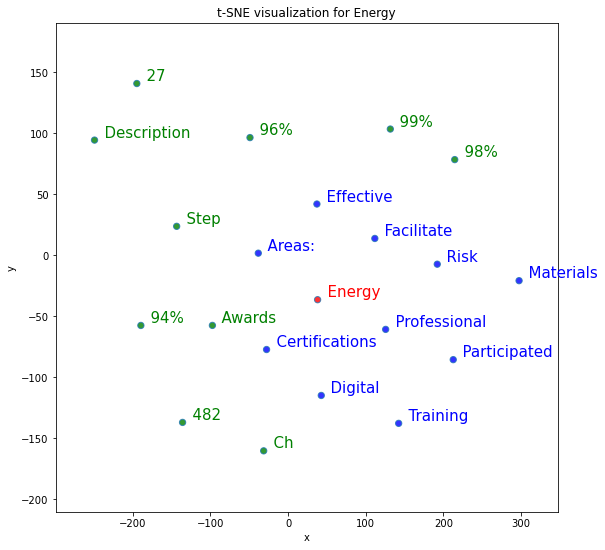

In [59]:
def word2vec_tsne(df,company_name,args):
    sent = [list(filter(lambda x:x not in stopwords.words('english'),row.split())) for row in df['sentence'].loc[df['name']==company_name]]
    phrases = Phrases(sent, min_count=10)
    bigram = Phraser(phrases)
    sentences = bigram[sent]

    w2v_model = Word2Vec(min_count=1,
                         window=3,
                         size=55,
                         sample=6e-5, 
                         alpha=0.05, 
                         min_alpha=0.0007, 
                         negative=20,
                         )
    w2v_model.build_vocab(sentences)
    w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)

    vocabs = []
    vecs = []
    for word in w2v_model.wv.vocab:
        vocabs.append(word)
        vecs.append(w2v_model[word])
    print(vocabs)

    sub_vecs = vecs[:40]
    sub_vocab = vocabs[:40]
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(sub_vecs)
    tsnescatterplot(w2v_model, args,  [i[0] for i in w2v_model.wv.most_similar(negative=['financial'])])

word2vec_tsne(insurance_sentences, 'Taiwan Life', 'energy')

### **3.2 LDA Mallet Model**


*   Build optimal LDA Mallet Model
*   Find optimal number of topics & save optimal model



In [71]:
#mallet_path = 'mallet-2.0.8/bin/mallet'

#try absolute path
mallet_path = 'C:\mallet\bin\mallet'

In [74]:
# function to compute coherence value of each model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #added .ldamallet
        #model = gensim.models.wrappers.ldamallet.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [62]:
#check params of the compute coherence values function
# print(id2word)

Dictionary(34362 unique tokens: ['bond', 'center', 'development', 'headquarters', 'org']...)


In [63]:
# corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(8, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1)],
 [(8, 1),
  (12, 1),
  (13, 1),
  (18, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(13, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(13, 1), (16, 1), (19, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)],
 [(12, 1),
  (13, 1),
  (29, 1),
  (41, 1),
  (42, 2),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 2)],
 [(0, 1),
  (2, 1),
  (5, 1),
  (37, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(0, 1),
  (2, 2),
  (5, 2),
  (36, 1),
  (60, 1),
  (61, 1),
  (72, 1),
  (73,

In [75]:
len(data_lemmatized)

203441

In [76]:
# find optimal model and optimal number of topics for LDA model (highest coherence value)
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=2)
max_value = max(coherence_values)
max_index = coherence_values.index(max_value)
topic_num = list(range(2, 21, 2))

CalledProcessError: Command 'C:\malletin\mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input C:\Users\LUXINY~1\AppData\Local\Temp\738804_corpus.txt --output C:\Users\LUXINY~1\AppData\Local\Temp\738804_corpus.mallet' returned non-zero exit status 1.

In [ ]:
# save optimal model and optimal number of topics
optimal_model = model_list[max_index]
optimal_num_topics = topic_num[max_index]

# get topics and keywords from optimal model
topics = optimal_model.show_topics(num_topics=optimal_num_topics, num_words=10,formatted=False)

In [ ]:
print("Optimal Coherence Score: " + str(max_value))

## **4. Data Analysis**

### **4.1 LDA model**

*   Determine which topics from optimal model are decarbonization related


In [ ]:
# function to determine whether a topic is related to decarbonization
def find_e_topics(topics):
    esg_words = ['carbon', 'footprint', 'clean', 'environment', 'esg', 'green', 'sustainability', 
                  'sustainable', 'energy', 'emission', 'climate', 'responsible', 'geothermal',
                  'environmental','decarbonization', 'decarbonisation', 'greenhouse','renewable', 'ozone']

    # Check for 'E' topics
    e_topic = []
    for n in range(len(topics)):
        words = [x[0] for x in topics[n][1]]
        for w in words:
            if w in esg_words:
                e_topic.append(n)
                break

    return e_topic  # returns topic number that are related to decarbonization

*   Assign dominant topic to each sentence

In [ ]:
# function to assign dominant topic
def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
  
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['document_no', 'dominant_topic', 'topic_perc_contrib', 'keywords', 'text']

# assign dominant topic to each sentence
all_sentences['dominant_topic'] = df_dominant_topic['dominant_topic']

*   Determine which sentences are decarbonization related


In [ ]:
# function that determines which sentences are decarbonization related
def assign_esg(df):
    e_topic = find_e_topics(topics)
    new_df = df
    new_df['esg'] = ""
    for i, row in df.iterrows():
        topic = new_df.iloc[i, new_df.columns.get_loc('dominant_topic')]
        if topic in e_topic:
            new_df.at[i, 'esg'] = "E"
        else:
            new_df.at[i, 'esg'] = "SG"
    return new_df

In [ ]:
df_with_assigned_topics = assign_esg(all_sentences)

*   Extract all decarbonization related sentences for bigram analysis (dashboard)


In [ ]:
# extract decarbonization related sentences for bigram analysis
all_e_sentences = df_with_assigned_topics[df_with_assigned_topics['esg'] == "E"]

*   Calculate percentage of decarbonization related sentences for each company

In [ ]:
# to calculate percentage
all_nrows = df_with_assigned_topics.groupby("name").size().reset_index(name='counts')
all_nrows.rename(columns={"counts": "total_sent"}, inplace = True)
e_score = all_e_sentences.groupby("name").size().reset_index(name='counts')
e_score.rename(columns={"counts": "e_sent"}, inplace = True)
all_percent = all_nrows.merge(e_score, how="left")
all_percent['percent'] = all_percent['e_sent']/all_percent['total_sent'] * 100
all_percent.fillna(0, inplace = True)
comp_fi = all_sentences[['name', 'type']].drop_duplicates()
all_percent = all_percent.merge(comp_fi, how='left')
all_percent.to_csv('trial/all_percent.csv')

### **4.2 Top 10 Word Count**

In [ ]:
df = all_sentences
df['words_lemmatized'] = data_lemmatized

In [ ]:
ab = df[df['type'] == 'ab'].name.unique().tolist()
am = df[df['type'] == 'am'].name.unique().tolist()
ins = df[df['type'] == 'ins'].name.unique().tolist()
pf = df[df['type'] == 'pf'].name.unique().tolist()

In [ ]:
def create_dict(df):
    comp_word = {}
    for i, row in df.iterrows():
        comp = df.iloc[i, df.columns.get_loc('name')]
        ls_words = df.iloc[i, df.columns.get_loc('words_lemmatized')]

        counts = Counter(ls_words)

        if comp not in comp_word:
            comp_word[comp] = dict(counts)
        else:
            curr = Counter(comp_word[comp])
            new = dict(curr + counts)
            comp_word[comp] = new

    return comp_word

In [ ]:
def top_10(comp_dict):
    df = pd.DataFrame(columns = ['name'])
    for key, value in comp_dict.items():
        top10 = dict(sorted(value.items(), key=operator.itemgetter(1), reverse=True)[:10])
        new = pd.DataFrame({'name': key, 'top10': top10}).reset_index()
        new = new.rename(columns={'top10': 'count','index': 'bigram'})
        
        if key in ab:
            new['type'] = 'ab'
        elif key in am:
            new['type'] = 'am'
        elif key in ins:
            new['type'] = 'ins'
        elif key in pf:
            new['type'] = 'pf'
        df = df.append(new)
    return df

In [ ]:
word_count_dict = create_dict(df)
all_word_count_top10 = top_10(word_count_dict)
all_word_count_top10.reset_index(inplace=True)
all_word_count_top10.drop('index', axis = 1, inplace=True)
all_word_count_top10.to_csv('trial/all_word_count_top10.csv') 

### **4.3 Extract Global Initiatives & Standards**

In [ ]:
def extract_initiatives(data):
    # import list of initiatives
    initiatives_file = pd.read_csv('data/esg_initiatives.csv', usecols=['Initiative'])
    initiatives = initiatives_file['Initiative'].tolist()

    companies = data['name'].unique().tolist()

    compiled_initiatives = []

    for company in companies: 
        partial_df = data.loc[data['name'] == company] #change type of FI accordingly (X2)
        type_of_fi = partial_df['type'].unique().tolist()[0]
        filtered_initiatives = []

    for sentence in partial_df['sentence']:
        sentence = str(sentence)
        for initiative in initiatives:
            if initiative in sentence and initiative not in filtered_initiatives: 
                filtered_initiatives.append(initiative)

        # To standardise the naming convention of HK Stock Exchange & Stock Exchange of HK
        if 'Hong Kong Stock Exchange' in filtered_initiatives:
            filtered_initiatives.remove('Hong Kong Stock Exchange')
            if 'Stock Exchange of Hong Kong' not in filtered_initiatives:
                filtered_initiatives.append('Stock Exchange of Hong Kong')
        count = len(filtered_initiatives)
        compiled_initiatives.append([company, filtered_initiatives, count, type_of_fi])

    initiatives_df = pd.DataFrame(compiled_initiatives, columns = ['name', 'initiatives', 'count', 'type'])
    return initiatives_df

In [ ]:
all_initiatives = extract_initiatives(all_sentences)
all_initiatives.to_csv('trial/all_initiatives.csv', index=False)

### **4.4 Bigram Analysis**

In [ ]:
#load spacy model
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm", disable=['ner'])

def tokenize(sentence):
    gen = gensim.utils.simple_preprocess(sentence, deacc=True)
    return ' '.join(gen)

def lemmatize(text):
  
    # parse sentence using spacy
    doc = nlp(text) 

    # convert words into their simplest form (singular, present form, etc.)
    lemma = []
    for token in doc:
        if (token.lemma_ not in ['-PRON-']):
            lemma.append(token.lemma_)

    return tokenize(' '.join(lemma))

In [ ]:
all_e_sentences = all_e_sentences.replace({np.nan: '-'})
all_e_sentences['lemma'] = all_e_sentences['sentence'].apply(lemmatize)

In [ ]:
def create_stopwords_for_bigram(): 
    # context specific keywords not to include in topic modelling
    context_stopwords = ['report', 'annualreport', 'pdf', 'firm', 'company', 'uobam', 'page', 'ceo', 
                      'content', 'index', 'guide', 'data', 'chairman', 'executive', 'chief', 'fiscal',
                      'stakeholders', 'acn', 'vs', 'yoy', 'brigade', 'station', 'site', 'table',
                      'journey', 'achieve', 'endure', 'reporting', 'period', 'head', 'way', 'gri', 
                      'holding', 'http', 'https', 'www', 'hi', 'audit', 'fy']

    country_stopwords = ['malaysia', 'hong', 'kong', 'china', 'country', 'region', 'japan', 'japanese', 
                      'tokyo', 'south', 'africa', 'france', 'switzerland', 'germany', 'rio', 
                      'kuala', 'lumpur', 'hk', 'hkex', 'australia', 'eu', 'chinese', 'mainland',
                      'citi', 'pacific', 'mitsubishi', 'cid', 'cppib', 'dai', 'chi']

    currency_stopwords = ['eur', 'million', 'es', 'dd', 'source', 'rmb', 'krw', 'trillion', 'billion', 'euro']                    

    date_stopwords = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 
                    'september', 'october', 'november', 'december', 'year', 'month', 'annual']

    stopwords = context_stopwords + country_stopwords + date_stopwords + currency_stopwords

    # add company names as stop words
    complabels = pd.read_csv('data/companylabels.csv', usecols=['fullname', 'shortform'])
    ls_comp = complabels['fullname'].unique().tolist() + complabels['shortform'].unique().tolist()
    for name in ls_comp:
        for n in name.split(' '):
            stop_words.append(n.lower())

    # our list contains all english stop words + companies names + specific keywords
    stop_words = text.ENGLISH_STOP_WORDS.union(stopwords)
    return stop_words

In [ ]:
def bigram(sub_df): 

    bigram_stopwords = create_stopwords_for_bigram()

    # Run bi-gram TF-IDF frequencies
    bigram_tf_idf_vectorizer = TfidfVectorizer(stop_words=bigram_stopwords, ngram_range=(2,2), min_df=1, use_idf=True)
    bigram_tf_idf = bigram_tf_idf_vectorizer.fit_transform(sub_df.lemma)

    # Extract bi-grams names
    words = bigram_tf_idf_vectorizer.get_feature_names()

    # extract our top 10 ngrams
    total_counts = np.zeros(len(words))
    for t in bigram_tf_idf:
        total_counts += t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    return count_dict

In [ ]:
data = []
companies = all_e_sentences['name'].unique().tolist()
for c in companies:
    sub_df = all_e_sentences.loc[all_e_sentences['name'] == c]
    bigram_dict = bigram(sub_df) 
    data.append([c, bigram_dict])

bigram_df = pd.DataFrame(data, columns = ['name', 'bigramarray'])
bigram_df.to_csv('trial/bigram_df.csv', index=False)

### **4.5 Calculate Sentiment Score** 

In [ ]:
def generate_sentiment_score(df):
    df['sentence']=[str(x).lower() for x in df['sentence']]
    df['tokenize']=[x.split(' ') for x in df['sentence']]
    df['sentiment']=df['sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)
    optimism=[]

    esg_keywords = ['best-in-class', 'carbon footprint', 'carbon pricing', 'clean technology', 'engagement', 'environmental factors', 'esg integration', 'ethical investing', 'exclusions', 'negative screening', 'governance factors', 'green bond', 'greenwashing', 'human rights', 'impact investments', 'modern slavery', 'PRI', 'proxy voting', 
                'renewable energy', 'screening', 'social factors', 'SRI', 'stewardship', 'thematic investing', 'SDG', 'values-based investing', 'voting rights', 'biodiversity', 'carbon capture and storage', 'circular economy', 'climate action tracker', 'climate clocks', 'climate funds', 
                'climate transition benchmarks', 'greenhouse gas emissions', 'net zero carbon pledge and initiative', 'paris agreement', 'paris-aligned benchmarks', 
                'PFAS', 'scope 1', 'scope 2', 'scope 3', 'sdg funds', 'sin stocks', 'smart esg scores', 'social sustainability', 'stewardship code', 'stranded assets', 'sustainable investing', 'sustainability reporting', 
                'sustainable supply chains', 'sustainable technology', 'thermal coal exposure', 'triple bottom line', 'un global impact','green','low-carbon']
    lst=['acidification','biofuel','carbon','carbon dioxide','climate','co2','climate change','decarbonisation','decarbonization','energy transmission','energy','energy transition','energy storage','emissions','emission control','fossil fuels','geothermal energy','geothermal','greenhouse gas','greenhouse','hydrocarbons','LNG','liquefied natural gas','ozone','renewable resources','sng','synthetic natural gas','thermal energy','thermal','wind power','wind']
    empty=[]
    all_keyword=[]
    word_collection=[]
    for i in df['sentence']:
        dic={}
        total=0
        keyword=[]
        for word in esg_keywords+lst:
            for j in range(0,len(i)):
                if i[j:j+len(word)]==word and word not in keyword:
                    total+=1
                    keyword.append(word)
                    dic[word]=1
                elif i[j:j+len(word)]==word:
                    total+=1
                    dic[word]+=1
        all_keyword.append(keyword)
        empty.append(total)
        word_collection.append(dic)

    df['freq']=empty      
    df['unique_keywords']=all_keyword
    df['words_collection']=word_collection

    score=[]
    for index,rows in df.iterrows(): 
        if rows['freq']==0:
            score.append(rows['sentiment'])
        else:
            score.append(rows['sentiment']+math.log(1+rows['freq']*len(rows['unique_keywords'])))
    df['sentiment_score']=score
    for i in df['sentiment_score']:
        if i<0:
            optimism.append('pessimistic')
        elif i<0.5:
            optimism.append('neutral')
        else:
            optimism.append('optimistic')
    df['optimism']=optimism
    return df

In [ ]:
asian_banks_1=generate_sentiment_score(new_ab)
pension_funds_1=generate_sentiment_score(new_pf)
asset_managers_1=generate_sentiment_score(new_am)
insurance_1=generate_sentiment_score(new_ins)

In [ ]:
#Generate Bag Of Words Model for each data frame
bow_asian_bank=bag_of_words(asian_banks_1)
bow_pension_funds=bag_of_words(pension_funds_1)
bow_insurance=bag_of_words(insurance_1)
bow_asset_managers=bag_of_words(asset_managers_1)

In [ ]:
#Regression Tree For predicting future sentiment score
def decision_tree_final(df2):
    tree_model=tree.DecisionTreeRegressor()
    x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(df2.drop(columns=['optimism']),df2[['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    tree_model.fit(x_train_1,y_train_1)
    tree_model.predict(x_test_1)
    print('The root mean squared error of Regression Tree is {}'.format(np.sqrt(mean_squared_error(y_test_1,tree_model.predict(x_test_1)))))
    x_test_1['predicted_optimism']=tree_model.predict(x_test_1).tolist()
    x_train_1['predicted_optimism']=tree_model.predict(x_train_1).tolist()
    df1=pd.concat([x_test_1,y_test_1],axis=1)
    df3=pd.concat([x_train_1,y_train_1],axis=1)
    return pd.concat([df1,df3],axis=0)

#Input Bag Of Words

#Linear Regression for predicting future sentiment score

def linear_regression(df2):
    lr=LinearRegression()
    x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(df2.drop(columns=['optimism']),df2[['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    lr.fit(x_train_1,y_train_1)
    lr.predict(x_test_1)
    print('The root mean squared error of Linear Regression is {}'.format(np.sqrt(mean_squared_error(y_test_1,lr.predict(x_test_1)))))
    x_test_1['predicted_optimism']=lr.predict(x_test_1)
    x_train_1['predicted_optimism']=lr.predict(x_train_1)
    df1=pd.concat([x_test_1,y_test_1],axis=1)
    df3=pd.concat([x_train_1,y_train_1],axis=1)
    return pd.concat([df1,df3],axis=0)

In [ ]:
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#Decision tree Classifier for sentiment analysis (df2 refers to the bag of words created in the previous line)
def decision_tree(df2):
    x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(df2.loc[df2['optimism']=='optimistic'].drop(columns=['optimism']),df2.loc[df2['optimism']=='optimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(df2.loc[df2['optimism']=='neutral'].drop(columns=['optimism']),df2.loc[df2['optimism']=='neutral'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(df2.loc[df2['optimism']=='pessimistic'].drop(columns=['optimism']),df2.loc[df2['optimism']=='pessimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_tree=pd.concat([x_train_1,x_train_2,x_train_3],axis=0)
    x_test_tree=pd.concat([x_test_1,x_test_2,x_test_3],axis=0)
    y_train_tree=pd.concat([y_train_1,y_train_2,y_train_3],axis=0)
    y_test_tree=pd.concat([y_test_1,y_test_2,y_test_3],axis=0)

    tree_model=tree.DecisionTreeClassifier()
    tree_model.fit(x_train_tree,y_train_tree)
    tree_accuracy=metrics.accuracy_score(y_test_tree,tree_model.predict(x_test_tree))
    print('Accuracy score of decision tree classifier is {}'.format(tree_accuracy))

    tree_confusion_matrix=metrics.multilabel_confusion_matrix(y_test_tree,tree_model.predict(x_test_tree))
    probs=tree_model.predict_proba(x_test_tree)[:,1]

    tree_confusion_matrix.tolist()
    metrics.plot_confusion_matrix(tree_model,x_test_tree,y_test_tree)
    plt.show()
    print(metrics.classification_report(y_test_tree,tree_model.predict(x_test_tree)))

def logistic_regression(df2):
    x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(df2.loc[df2['optimism']=='optimistic'].drop(columns=['optimism']),df2.loc[df2['optimism']=='optimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(df2.loc[df2['optimism']=='neutral'].drop(columns=['optimism']),df2.loc[df2['optimism']=='neutral'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(df2.loc[df2['optimism']=='pessimistic'].drop(columns=['optimism']),df2.loc[df2['optimism']=='pessimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
    x_train_tree=pd.concat([x_train_1,x_train_2,x_train_3],axis=0)
    x_test_tree=pd.concat([x_test_1,x_test_2,x_test_3],axis=0)
    y_train_tree=pd.concat([y_train_1,y_train_2,y_train_3],axis=0)
    y_test_tree=pd.concat([y_test_1,y_test_2,y_test_3],axis=0)

    tree_model=linear_model.LogisticRegression()
    tree_model.fit(x_train_tree,y_train_tree)
    tree_accuracy=metrics.accuracy_score(y_test_tree,tree_model.predict(x_test_tree))
    print('Accuracy score of logstic regression is {}'.format(tree_accuracy))

    tree_confusion_matrix=metrics.multilabel_confusion_matrix(y_test_tree,tree_model.predict(x_test_tree))
    probs=tree_model.predict_proba(x_test_tree)[:,1]

    tree_confusion_matrix.tolist()
    metrics.plot_confusion_matrix(tree_model,x_test_tree,y_test_tree)
    plt.show()
    print(metrics.classification_report(y_test_tree,tree_model.predict(x_test_tree)))


# def svm(df2):
#     x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(df2.loc[df2['optimism']=='optimistic'].drop(columns=['optimism']),df2.loc[df2['optimism']=='optimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
#     x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(df2.loc[df2['optimism']=='neutral'].drop(columns=['optimism']),df2.loc[df2['optimism']=='neutral'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
#     x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(df2.loc[df2['optimism']=='pessimistic'].drop(columns=['optimism']),df2.loc[df2['optimism']=='pessimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
#     x_train_tree=pd.concat([x_train_1,x_train_2,x_train_3],axis=0)
#     x_test_tree=pd.concat([x_test_1,x_test_2,x_test_3],axis=0)
#     y_train_tree=pd.concat([y_train_1,y_train_2,y_train_3],axis=0)
#    y_test_tree=pd.concat([y_test_1,y_test_2,y_test_3],axis=0)

#    tree_model=SVC()
#    tree_model.fit(x_train_tree,y_train_tree)
#    tree_accuracy=metrics.accuracy_score(y_test_tree,tree_model.predict(x_test_tree))
#    print('Accuracy score of svm is {}'.format(tree_accuracy))

#    tree_confusion_matrix=metrics.multilabel_confusion_matrix(y_test_tree,tree_model.predict(x_test_tree))
#    probs=tree_model.predict_proba(x_test_tree)[:,1]

#    tree_confusion_matrix.tolist()
#    metrics.plot_confusion_matrix(tree_model,x_test_tree,y_test_tree)
#    plt.show()
#    print(metrics.classification_report(y_test_tree,tree_model.predict(x_test_tree)))

def naive_bayes(df2):
   x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(df2.loc[df2['optimism']=='optimistic'].drop(columns=['optimism']),df2.loc[df2['optimism']=='optimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
   x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(df2.loc[df2['optimism']=='neutral'].drop(columns=['optimism']),df2.loc[df2['optimism']=='neutral'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
   x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(df2.loc[df2['optimism']=='pessimistic'].drop(columns=['optimism']),df2.loc[df2['optimism']=='pessimistic'][['optimism']],train_size=0.7,test_size=0.3,random_state=1)
   x_train_tree=pd.concat([x_train_1,x_train_2,x_train_3],axis=0)
   x_test_tree=pd.concat([x_test_1,x_test_2,x_test_3],axis=0)
   y_train_tree=pd.concat([y_train_1,y_train_2,y_train_3],axis=0)
   y_test_tree=pd.concat([y_test_1,y_test_2,y_test_3],axis=0)

   tree_model=MultinomialNB()
   tree_model.fit(x_train_tree,y_train_tree)
   tree_accuracy=metrics.accuracy_score(y_test_tree,tree_model.predict(x_test_tree))
   print('Accuracy score of naive bayes is {}'.format(tree_accuracy))

   tree_confusion_matrix=metrics.multilabel_confusion_matrix(y_test_tree,tree_model.predict(x_test_tree))
   probs=tree_model.predict_proba(x_test_tree)[:,1]

   tree_confusion_matrix.tolist()
   metrics.plot_confusion_matrix(tree_model,x_test_tree,y_test_tree)
   plt.show()
   print(metrics.classification_report(y_test_tree,tree_model.predict(x_test_tree)))


In [ ]:
decision_tree(bow_asian_bank) 

In [ ]:
decision_tree(bow_pension_funds)  

In [ ]:
decision_tree(bow_insurance) 

In [ ]:
decision_tree(bow_asset_managers) 

In [ ]:
logistic_regression(bow_asian_banks) 

In [ ]:
logistic_regression(bow_pension_funds) 

In [ ]:
logistic_regression(bow_insurance) 

In [ ]:
logistic_regression(bow_asset_managers) 

In [ ]:
naive_bayes(bow_asian_bank)

In [ ]:
naive_bayes(bow_pension_funds)

In [ ]:
naive_bayes(bow_insurance)

In [ ]:
naive_bayes(bow_asset_managers)

In [ ]:
asian_bank_sentiment=decision_tree_final(bow_asian_bank).sort_index()
insurance_sentiment=decision_tree_final(bow_insurance).sort_index()
asset_managers_sentiment=decision_tree_final(bow_asset_managers).sort_index()
pension_funds_sentiment=decision_tree_final(bow_pension_funds).sort_index()

insurance_sentiment_lr=linear_regression(bow_insurance).sort_index()
asset_managers_sentiment_lr=linear_regression(bow_asset_managers).sort_index()
pension_funds_sentiment_lr=linear_regression(bow_pension_funds).sort_index()
asian_banks_sentiment_lr=linear_regression(bow).sort_index()

In [ ]:
insurance_1['predicted_sentiment_tree']=insurance_sentiment['predicted_optimism']
asset_managers_1['predicted_sentiment_tree']=asset_managers_sentiment['predicted_optimism']
pension_funds_1['predicted_sentiment_tree']=pension_funds_sentiment['predicted_optimism']
asian_banks_1['predicted_sentiment_tree']=asian_banks_sentiment['predicted_optimism']

insurance_1['predicted_sentiment_lr']=insurance_sentiment_lr['predicted_optimism']
asset_managers_1['predicted_sentiment_lr']=asset_managers_sentiment_lr['predicted_optimism']
pension_funds_1['predicted_sentiment_lr']=pension_funds_sentiment_lr['predicted_optimism']
asian_banks_1['predicted_sentiment_lr']=asian_banks_sentiment_lr['predicted_optimism']

In [ ]:
#Computation of current average sentiment scores for each company
df_insurance=pd.DataFrame(insurance_1.groupby(['name'])['sentiment_score'].mean().reset_index())
df_insurance['type']="ins"

df_asset_managers=pd.DataFrame(asset_managers_1.groupby(['name'])['sentiment_score'].mean().reset_index())
df_asset_managers['type']="am"

df_pension_funds=pd.DataFrame(pension_funds_1.groupby(['name'])['sentiment_score'].mean().reset_index())
df_pension_funds['type']="pf"

df_asian_banks=pd.DataFrame(asian_banks_1.groupby(['name'])['sentiment_score'].mean().reset_index())
df_asian_banks['type']="ab"

all_df=pd.concat([df_asian_banks,df_asset_managers,df_pension_funds,df_insurance],0).reset_index(drop=True)

In [ ]:
#Computation of average predicted sentiment scores for each company using Regression Tree
df_insurance_new=pd.DataFrame(insurance_1.groupby(['name'])['predicted_sentiment_tree'].mean().reset_index())
df_insurance_new['type']="ins"

df_asset_managers_new=pd.DataFrame(asset_managers_1.groupby(['name'])['predicted_sentiment_tree'].mean().reset_index())
df_asset_managers_new['type']="am"

df_pension_funds_new=pd.DataFrame(pension_funds_1.groupby(['name'])['predicted_sentiment_tree'].mean().reset_index())
df_pension_funds_new['type']="pf"

df_asian_banks_new=pd.DataFrame(asian_banks_1.groupby(['name'])['predicted_sentiment_tree'].mean().reset_index())
df_asian_banks_new['type']="ab"

all_df_new=pd.concat([df_asian_banks_new,df_asset_managers_new,df_pension_funds_new,df_insurance_new],0).reset_index(drop=True)

In [ ]:
#Computation of average predicted sentiment scores for each company using Linear Regression
df_insurance_new_lr=pd.DataFrame(insurance_1.groupby(['name'])['predicted_sentiment_lr'].mean().reset_index())
df_asset_managers_new_lr=pd.DataFrame(asset_managers_1.groupby(['name'])['predicted_sentiment_lr'].mean().reset_index())
df_pension_funds_new_lr=pd.DataFrame(pension_funds_1.groupby(['name'])['predicted_sentiment_lr'].mean().reset_index())
df_asian_banks_new_lr=pd.DataFrame(asian_banks_1.groupby(['name'])['predicted_sentiment_lr'].mean().reset_index())
all_df_new_lr=pd.concat([df_asian_banks_new_lr,df_asset_managers_new_lr,df_pension_funds_new_lr,df_insurance_new_lr],0).reset_index(drop=True)

In [ ]:
final_df=pd.concat([all_df_new,all_df_new_lr['predicted_sentiment_lr']],axis=1)
final_df.to_csv('trial/sentiment_score_comparisons.csv')